In [1]:
import numpy as np
import math 
import matplotlib.pyplot as plt
from scipy import linalg


# Data Preparation

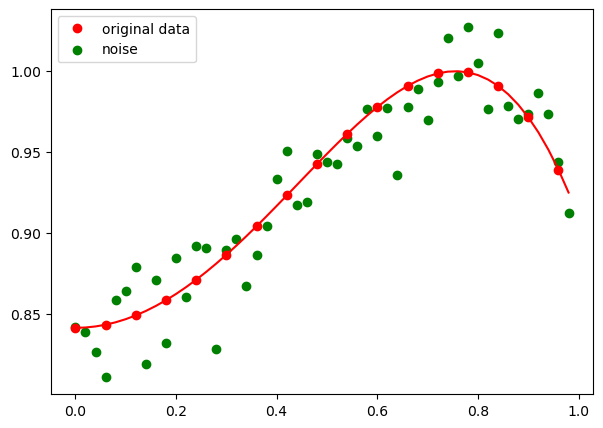

In [26]:
x = np.arange(0,1,0.02)
y = np.sin(x**2 + 1)
sigma = 0.02
noise = np.random.normal(0,sigma,len(x))
y_noise = y+noise
plt.figure(figsize = (7,5))
plt.plot(x,y,'or',markevery = 3,label = 'original data')
plt.plot(x,y,'red')
plt.scatter(x,y_noise,color = 'green',label = 'noise')
plt.legend(loc='best')
#an = np.polyfit(x,y,3)
#yvals = np.polyval(an, x)
#plt.plot(x,yvals,color = 'red')

# Part 1: MAP 

In [3]:
def cal(x,M,alpha):
    beta = 1/(sigma**2)
    t_bar = np.zeros(len(x))
    X = np.zeros((len(x),M+1))
    #X_or = X_or.reshape(len(x),M)
    for i in range(len(x)):
        for j in range(M+1):
            X[i][j] = np.power(x[i],j)
        t_bar[i] = y_noise[i]
    tmp = linalg.inv((alpha/beta)*np.identity(M+1)+np.dot(X.T, X))
    w_bar = np.dot(np.dot(tmp,X.T),t_bar)
    y_map = np.dot(X,w_bar)    
    return y_map

Text(0.5, 1.0, 'overfitting MAP with M=10, Alpha = 0')

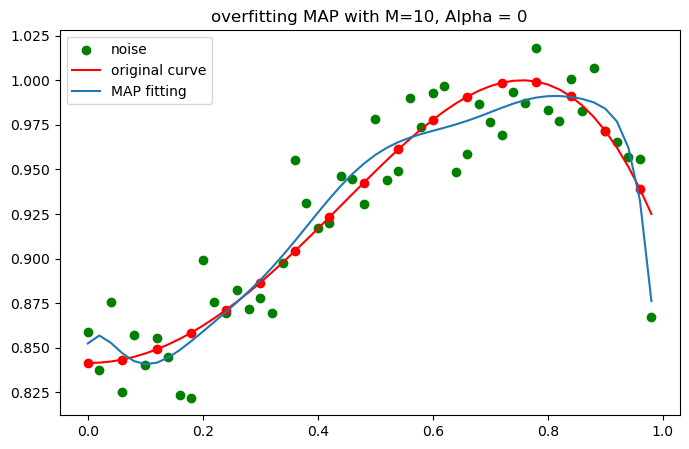

In [16]:
alpha = 0
M = 10
plt.figure(figsize = (8,5))
plt.plot(x,y,'ro',markevery=3)
plt.scatter(x,y_noise,color = 'green',label = 'noise')
plt.plot(x,y,color = 'red',label = 'original curve')
plt.plot(x,cal(x,M,alpha),label = 'MAP fitting')
plt.legend(loc = 'best')
plt.title('overfitting MAP with M=10, Alpha = 0')

Text(0.5, 1.0, 'MAP with M =10, Alpha = 0.4')

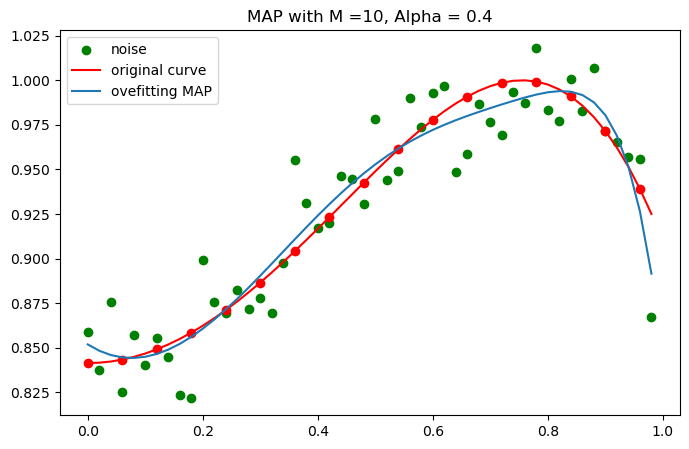

In [15]:
M2 = 10
alpha2 = 0.4
plt.figure(figsize = (8,5))
plt.plot(x,y,'ro',markevery=3)
plt.scatter(x,y_noise,color = 'green',label = 'noise')
plt.plot(x,y,color = 'red',label = 'original curve')
plt.plot(x,cal(x,M2,alpha2),label = 'ovefitting MAP')
plt.legend(loc = 'best')
plt.title('MAP with M =10, Alpha = 0.4')

#From the experiment in #7, discuss how M and alpha influence on the fitting accuracy.

Increasing M, the model complexity, will increase the model training performance, that is the model fitting accuracy will rise. 
But if M is too large, it would be an ovrefitting problem, that is during the testing stage the model will perform bad.
In this circumstance, increasing alpha would be a good method to fix overfitting, enabling the model perform best.

# Part 2: BASIS FUNCTION
1.Gaussian basis on MLE Function

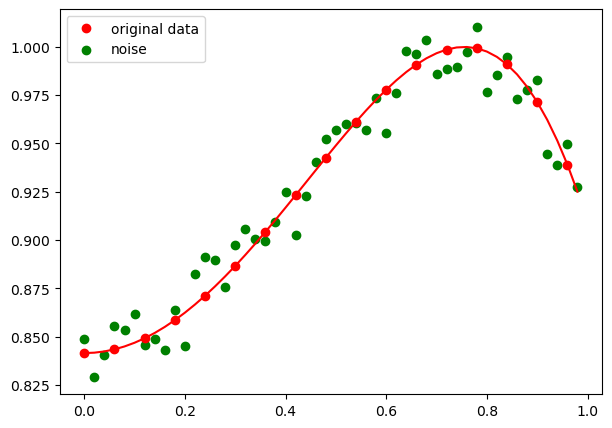

In [74]:
x = np.arange(0,1,0.02)
y = np.sin(x**2 + 1)
sigma = 0.01
noise = np.random.normal(0,sigma,len(x))
y_noise = y+noise
plt.figure(figsize = (7,5))
plt.plot(x,y,'or',markevery = 3,label = 'original data')
plt.plot(x,y,'red')
plt.scatter(x,y_noise,color = 'green',label = 'noise')
plt.legend(loc='best')

In [144]:
def col_fi(x,u,s,M):
    fik_col = np.exp(-(x-u)**2/2/s**2)
    #print(fik_col)
    return fik_col

def cal_gauMLE(N,M,s,um):
    cap_fi = np.zeros((N,M))
    t_mle = np.zeros((N,1))
    for i in range (N):
        t_mle[i] = y_noise[i]

    for i in range(M):
        #for j in range (M):
        if i ==0:
            cap_fi[:,i] = 1
        else:
            #cap_fi[:,i] = col_fi(x,round(um[i-1],2),s,M)
            cap_fi[:,i] = col_fi(x,um[i-1],s,M)
    w_bar_mle = np.dot(np.dot(linalg.inv(np.dot(cap_fi.T,cap_fi)),cap_fi.T),t_mle)
    y_pred_mle = np.dot(cap_fi,w_bar_mle)
    return y_pred_mle

Text(0.5, 1.0, 'Gaussian MLE overfitting, M = 25')

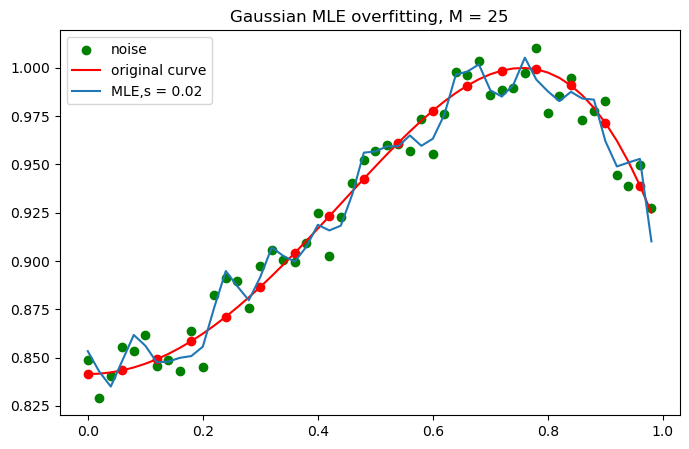

In [179]:
# overfitting
N = len(x)
M =  25# model complexity
um = np.arange(1/M,1,1/M)
s = 0.02
plt.figure(figsize = (8,5))
plt.plot(x,y,'ro',markevery=3)
plt.scatter(x,y_noise,color = 'green',label = 'noise')
plt.plot(x,y,color = 'red',label = 'original curve')
plt.plot(x,cal_gauMLE(N,M,s,um),label = 'MLE,s = %s'%s)
#plt.plot(x,calMLE(x,M2),label = 'MLE overfitting, M = 11')
plt.legend(loc = 'best')
plt.title('Gaussian MLE overfitting, M = %s'%M)

Text(0.5, 1.0, 'Gaussian MLE good fitting, M = 5')

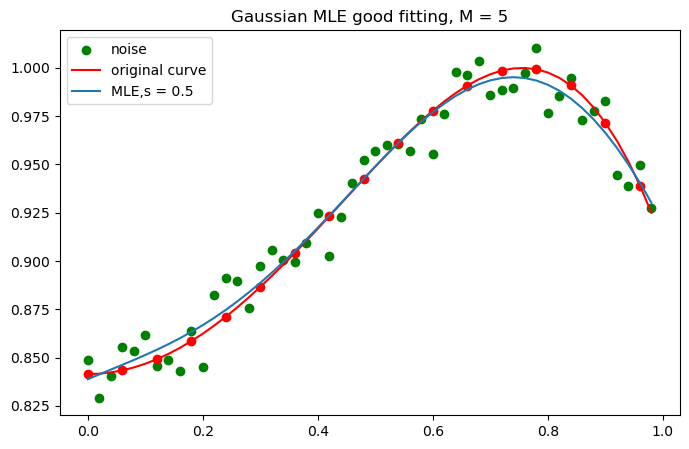

In [176]:
# best fitting
N = len(x)
M =  5# model complexity
um = np.arange(1/M,1,1/M)
s = 0.5
plt.figure(figsize = (8,5))
plt.plot(x,y,'ro',markevery=3)
plt.scatter(x,y_noise,color = 'green',label = 'noise')
plt.plot(x,y,color = 'red',label = 'original curve')
plt.plot(x,cal_gauMLE(N,M,s,um),label = 'MLE,s = %s'%s)
#plt.plot(x,calMLE(x,M2),label = 'MLE overfitting, M = 11')
plt.legend(loc = 'best')
plt.title('Gaussian MLE good fitting, M = %s'%M)

Text(0.5, 1.0, 'Gaussian MLE  underfitting, M = 3')

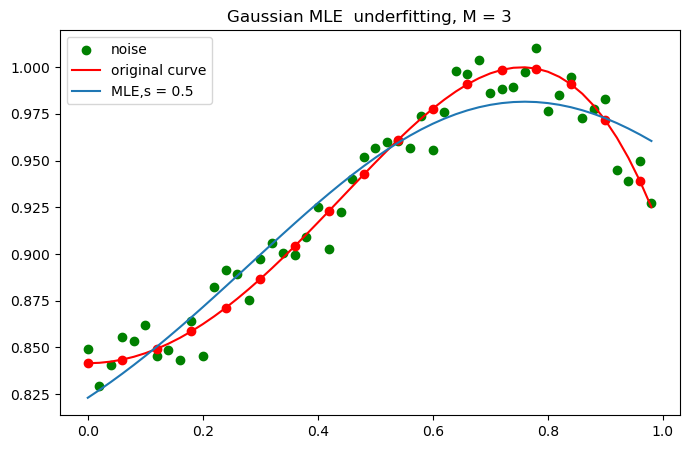

In [175]:
# best fitting
N = len(x)
M =  3# model complexity
um = np.arange(1/M,1,1/M)
#um = np.arange(0,(M-1)/M,1/M)
s = 0.5
plt.figure(figsize = (8,5))
plt.plot(x,y,'ro',markevery=3)
plt.scatter(x,y_noise,color = 'green',label = 'noise')
plt.plot(x,y,color = 'red',label = 'original curve')
plt.plot(x,cal_gauMLE(N,M,s,um),label = 'MLE,s = %s'%s)
#plt.plot(x,calMLE(x,M2),label = 'MLE overfitting, M = 11')
plt.legend(loc = 'best')
plt.title('Gaussian MLE  underfitting, M = %s'%M)

In [ ]:
# M=5, S=0.2-0.5 best fitting
#M =10 s = 0.02 overfitting
#M =3,s = 0.5 underfitting

2. Sigmoid basis on MLE function

In [ ]:
def sigmoid():
    

# Part 3: FULL BAYESIAN + PREDICTIVE DISTRIBUTION

In [ ]:
x = np.arange(0,1,0.02)
y = np.sin(x**2 + 1)
sigma = 0.02
noise = np.random.normal(0,sigma,len(x))
y_noise = y+noise
plt.figure(figsize = (7,5))
plt.plot(x,y,'or',markevery = 3,label = 'original data')
plt.plot(x,y,'red')
plt.scatter(x,y_noise,color = 'green',label = 'noise')
plt.legend(loc='best')

In [ ]:
def fi(n,m,x):
    for i in range n:
        for j in range (m):
            fi_m =math.exp(-(x-u)**2/(2*s**2))
            

In [ ]:
# var definition
beta_bay = 1/sigma**2
alpha_bay = 0.4
big_fi = 

In [ ]:
w_bay = 